In [1]:
import numpy as np
from scipy.signal import argrelmin
import matplotlib.pyplot as plt
# plt.style.use('~/Dropbox/matplotlib_styles/line_plot.mplstyle')
import json
import os
from pathlib import Path

C6 = 2 * np.pi * 862690

In [2]:
d_name = "data/23-06-30_23-27-29/phase_diagram_data"
f_names = os.listdir(d_name)

rbs_over_a = []
deltas_over_omega = []
energies = []
densities = []

d2E2 = []
d2E2_minima = []

for f_name in f_names:

  with open(Path(d_name, f_name), 'r') as f:
    data_dict = json.load(f)

  omega = data_dict["params"]["hamiltonian_params"]["omega"]
    
  Rb = (C6 / omega) ** (1 / 6)

  rbs_over_a.append(Rb / data_dict["params"]["hamiltonian_params"]["a"])
  deltas_over_omega.append(data_dict["params"]["hamiltonian_params"]["delta"] / omega)
  
  energies.append(data_dict["result"]["energy"])
  densities.append(data_dict["result"]["rydberg_density"])

rb_over_a_pts = len(set(rbs_over_a))
delta_over_omega_pts = len(set(deltas_over_omega))

rbs = np.array(rbs_over_a)
deltas = np.array(deltas_over_omega)
energies = np.array(energies)
densities = np.array(densities)

index_array = np.argsort(rbs)

rbs = np.take_along_axis(rbs, index_array, axis=0)
deltas = np.take_along_axis(deltas, index_array, axis=0)
energies= np.take_along_axis(energies, index_array, axis=0)

for ii in range(densities.shape[-1]):
    densities[:, ii] = np.take_along_axis(densities[:, ii], index_array, axis=0)

rbs = np.reshape(rbs, (rb_over_a_pts, delta_over_omega_pts))
deltas = np.reshape(deltas, (rb_over_a_pts, delta_over_omega_pts))
energies = np.reshape(energies, (rb_over_a_pts, delta_over_omega_pts))
densities = np.reshape(densities, (rb_over_a_pts, delta_over_omega_pts, -1))

for ii in range(rb_over_a_pts):
    index_array = np.argsort(deltas[ii])

    deltas[ii] = np.take_along_axis(deltas[ii], index_array, axis=0)
    energies[ii] = np.take_along_axis(energies[ii], index_array, axis=0)

    for jj in range(densities.shape[-1]):
        densities[ii, :, jj] = np.take_along_axis(densities[ii, :, jj], index_array, axis=0)

delta_ax = deltas[0]
rb_ax = rbs[:, 0]

for ii in range(rb_over_a_pts):
  temp = np.gradient(energies[ii], delta_ax, edge_order=2)
  temp = np.gradient(temp, delta_ax, edge_order=2)

  d2E2.append(temp)
  d2E2_minima.append(np.argmin(temp))
  # d2E2_minima.append(argrelmin(temp)[0])

d2E2 = np.reshape(d2E2, (rb_over_a_pts, -1))

n_sites = data_dict["params"]["hamiltonian_params"]["n_sites"]

In [3]:
minima_x = []
minima_y = []
for ii, a in enumerate(rb_ax):
    minimum = d2E2_minima[ii]

    if minimum == 0 or minimum == len(delta_ax) - 1:
        continue
    else:
        minima_x.append(delta_ax[minimum])
        minima_y.append(a)
        
# minima_x = []
# minima_y = []
# for ii, a in enumerate(rb_ax):
#     minima = d2E2_minima[ii]
    
#     for minimum in minima:
#         if minimum == 0 or minimum == len(delta_ax) - 1:
#             continue
#         else:
#             minima_x.append(delta_ax[minimum])
#             minima_y.append(a)

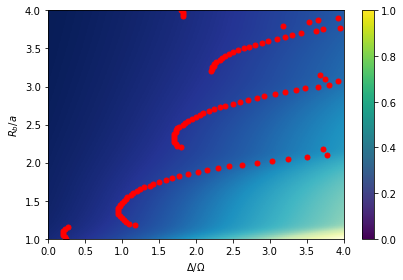

In [48]:
plt.imshow(energies, cmap="YlGnBu", extent=(delta_ax[0], delta_ax[-1], rb_ax[0], rb_ax[-1]), aspect="auto", origin="lower")
plt.scatter(minima_x, minima_y, s=25, c='r', marker="o")

plt.colorbar()



plt.xlabel(r"$\Delta/\Omega$")
plt.ylabel(r"$R_b/a$") #Check this axis orientation, etc

plt.tight_layout()
plt.show()

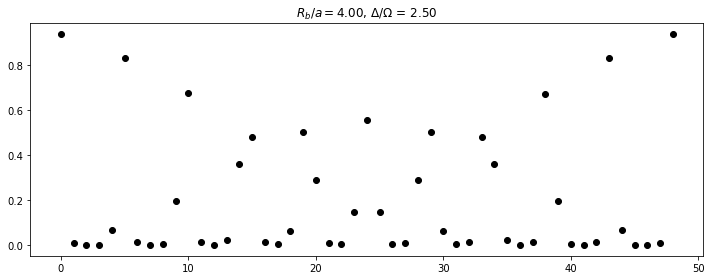

In [23]:
a_ind = -1
delta_ind = 100

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(densities[a_ind, delta_ind], 'ko')
ax.set_title(fr"$R_b / a=${rb_ax[a_ind]:.2f}, $\Delta/\Omega$ = {delta_ax[delta_ind]:.2f}")

plt.tight_layout()
plt.show()

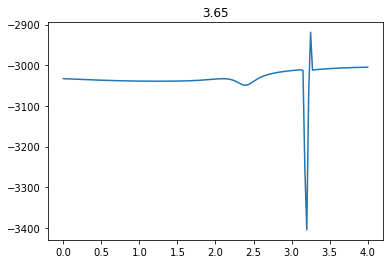

In [39]:
ind = -15

plt.plot(delta_ax, d2E2[ind] + 200 * ind)
plt.title(rb_ax[ind])
plt.show()